In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [42]:
# puntos aleatorios fijos
np.random.seed(42)  # semilla para reproducibilidad
k = 8  # cant de puntos
points = np.random.uniform(0, 8, (k, 2))  # puntos en el rectángulo [0, 8]x[0, 8]

In [43]:
sigma = 1.0

In [44]:
# Definición de la función suma de gaussianas (norma cuadrada corregida)
def f(x):
    """Función suma de gaussianas con norma cuadrada."""
    return -np.sum(np.exp(-np.linalg.norm(x - points, axis=1)**2 / (2 * sigma)))

In [45]:
x = np.linspace(0, 10, 200)
y = np.linspace(0, 10, 200)
X, Y = np.meshgrid(x, y)
Z = np.array([[f([i, j]) for i, j in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

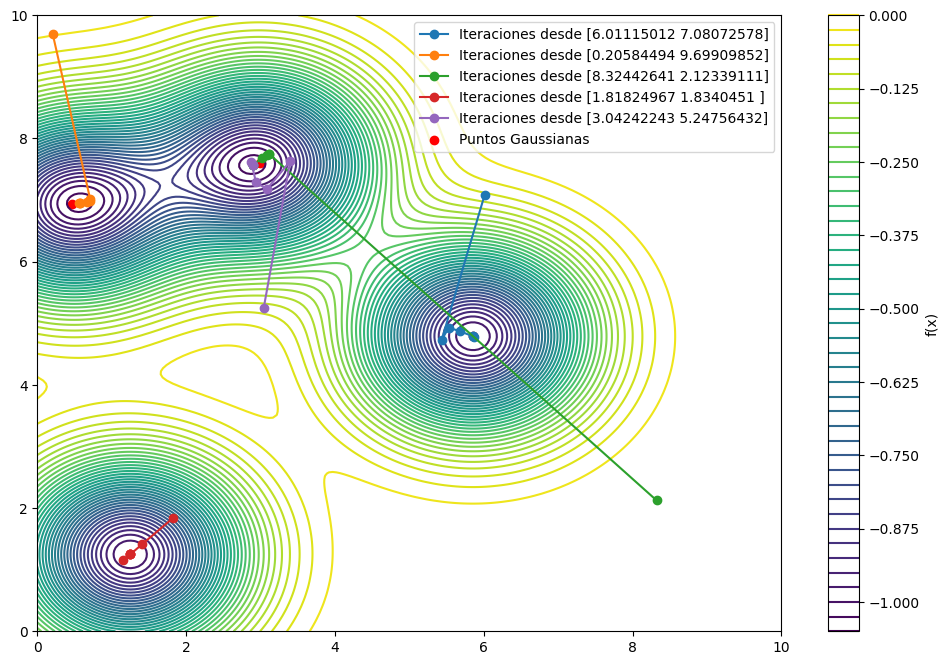

In [46]:
plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z, levels=50)
plt.colorbar(label="f(x)")

# Función para aplicar el método de optimización desde un punto inicial
def find_local_min(x0):
    """Aplica optimización desde un punto inicial."""
    path = [x0]  # Guardar las iteraciones
    callback = lambda xk: path.append(xk)  # Callback para almacenar cada iteración

    res = minimize(f, x0, method='BFGS', callback=callback)
    return np.array(path), res.success

# Ejecutar optimización desde varios puntos iniciales y graficar las iteraciones
initial_points = np.random.uniform(0, 10, (5, 2))  # 5 puntos iniciales
for x0 in initial_points:
    path, success = find_local_min(x0)

    if success:
        plt.plot(path[:, 0], path[:, 1], '-o', label=f'Iteraciones desde {x0}')

plt.scatter(points[:, 0], points[:, 1], color='red', label='Puntos Gaussianas')
plt.legend()
plt.show()